X1     0
X2     0
Y     10
dtype: int64


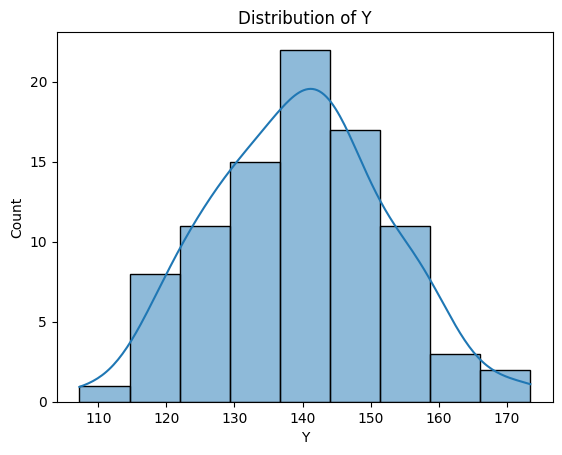

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('your_dataset.csv')

# Check missing values
print(df.isnull().sum())

# Visualize missing Y
sns.histplot(df['Y'], kde=True)
plt.title("Distribution of Y")
plt.show()


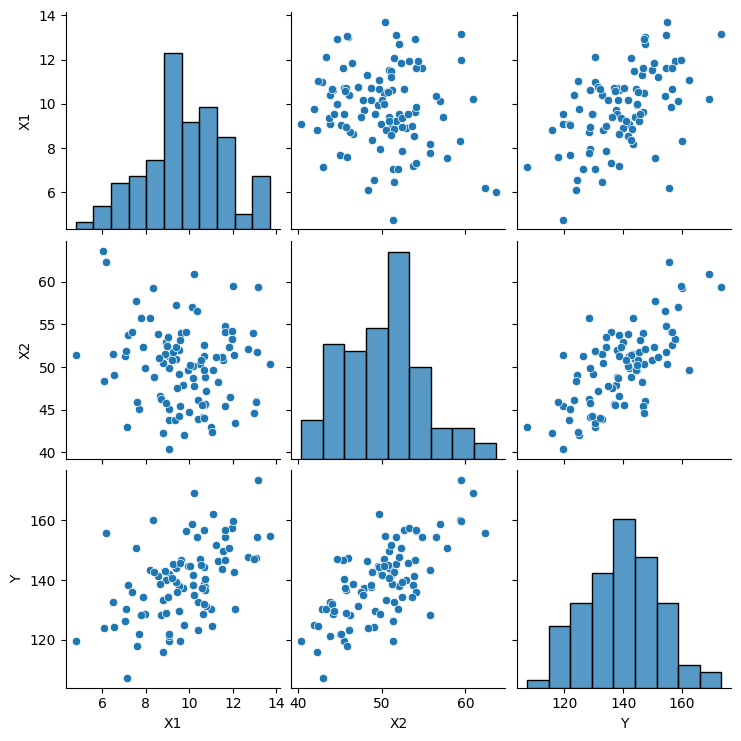

          X1        X2         Y
X1  1.000000 -0.136422  0.509190
X2 -0.136422  1.000000  0.704913
Y   0.509190  0.704913  1.000000


In [6]:
sns.pairplot(df)
plt.show()

print(df.corr())


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
train_df = df[df['Y'].notnull()]
test_df = df[df['Y'].isnull()]

# Train model on complete cases
X_train = train_df.drop('Y', axis=1)
y_train = train_df['Y']
X_test = test_df.drop('Y', axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Y
df.loc[df['Y'].isnull(), 'Y'] = model.predict(X_test)


ModuleNotFoundError: No module named 'sklearn'

In [7]:
from sklearn.impute import KNNImputer, SimpleImputer

# Mean Imputation
mean_imp = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean['Y'] = mean_imp.fit_transform(df[['Y']])

# KNN Imputation
knn_imp = KNNImputer(n_neighbors=3)
df_knn = pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)


ModuleNotFoundError: No module named 'sklearn'